# 금융 CSS 개발

이해원

전처리 내역 & 함수 목록
- get_loan_month: 대출기간 전처리
- get_work_year: 근로기간 전처리
- ID 컬럼 drop
- 부채_대비_소득_비율 9999 drop

컬럼 추가 내역
- get_plus_col
- get_home

## 2. 전처리 취합

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'

C:\Users\LOVE\AppData\Local\Temp\ipykernel_16712\1903085813.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/CSS/train.csv')
test_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/CSS/test.csv')

train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [3]:
print(train_df.shape, test_df.shape)

(96294, 15) (64197, 14)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


### (1) 전처리

In [5]:
# 대출기간 전처리
def get_loan_month(mt):
    return int(mt.strip().replace('months', ''))

train_df['대출기간'] = train_df['대출기간'].apply(get_loan_month)
train_df[['대출기간']]

,대출기간
0,36
1,60
2,36
3,36
4,60
...,...
96289,36
96290,60
96291,36
96292,36


In [6]:
# 근로기간 전처리
def get_work_year(yr):
    if yr in ['<1 year', '< 1 year']:
        return 0
    elif yr in ['1 year', '1 years']:
        return 1
    elif yr in ['10+ years', '10+years']:
        return 10
    # 'Unknown'은 NaN으로 대체
    elif yr == 'Unknown':
        return np.nan
    # 그 외는 숫자만 추출
    else:
        return int(''.join(filter(str.isdigit, yr)))

train_df['근로기간'] = train_df['근로기간'].apply(get_work_year)
train_df[['근로기간']]

,근로기간
0,6.0
1,10.0
2,5.0
3,8.0
4,NaN
...,...
96289,10.0
96290,10.0
96291,1.0
96292,5.0


In [7]:
# ID 컬럼 drop
train_df = train_df.drop('ID', axis = 1)

In [8]:
# 부채_대비_소득_비율 전처리
train_df = train_df.drop(train_df[train_df['부채_대비_소득_비율']==9999].index)

In [9]:
train_df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


### (2) 추가할 컬럼

In [177]:
def get_plus_col(df):
    df['상환부담율'] = df['총상환이자'] / df['대출금액'] * 100
    df['상환율'] = df['총상환원금'] / df['대출금액'] * 100
    df['대출_대비_총상환금_비율'] = (df['총상환원금'] + df['총상환이자']) / df['대출금액']
    df['잔여상환금_대비_연체금액_비율'] = df['총연체금액'] / (df['대출금액'] - df['총상환원금'])
    df['연체계좌비율'] = df['연체계좌수'] / df['총계좌수']

get_plus_col(train_df)
train_df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.0,0.0,0
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1.625417,2.594250,0.042197,0.0,0.0,0
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1.266200,7.738700,0.090049,0.0,0.0,0
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,1.063250,2.262667,0.033259,0.0,0.0,0
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.827533,1.269667,0.020972,0.0,0.0,0


In [11]:
# 주택소유여부
def get_home(chr):
    if chr in ['MORTGAGE', 'RENT', 'ANY']:
        return 0
    else:
        return 1

train_df['주택소유여부'] = train_df['주택소유상태'].apply(get_home)
train_df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.0,0.0,0
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.016254,0.025943,0.042197,0.0,0.0,0
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.012662,0.077387,0.090049,0.0,0.0,0
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.010632,0.022627,0.033259,0.0,0.0,0
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.008275,0.012697,0.020972,0.0,0.0,0


In [12]:
train_df.describe(include='all')

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부
count,9.629300e+04,96293.000000,90623.000000,96293,9.629300e+04,96293.000000,96293.000000,96293,96293.000000,9.629300e+04,9.629300e+04,96293.000000,96293.000000,96293,96293.000000,96293.000000,96293.000000,96288.000000,96293.000000,96293.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,47933,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.830414e+07,43.929548,6.007791,NaN,9.392770e+07,19.275952,25.304882,NaN,0.345664,8.225099e+05,4.282318e+05,54.381149,0.005805,NaN,0.022566,0.047841,0.070408,0.000005,0.000238,0.110641
std,1.032903e+07,11.288611,3.728511,NaN,9.956877e+07,9.624810,12.088616,NaN,0.919108,1.027749e+06,4.402120e+05,1414.776554,0.079967,NaN,0.015549,0.047854,0.054308,0.000268,0.003627,0.313689
min,1.200000e+06,36.000000,0.000000,NaN,1.440000e+06,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.020000e+07,36.000000,2.000000,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN,0.010841,0.023493,0.032797,0.000000,0.000000,0.000000
50%,1.680000e+07,36.000000,6.000000,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870160e+05,0.000000,0.000000,NaN,0.019492,0.043673,0.065304,0.000000,0.000000,0.000000
75%,2.400000e+07,60.000000,10.000000,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000,NaN,0.030988,0.069640,0.096486,0.000000,0.000000,0.000000


## 3. 상관관계

In [13]:
train_df2 = train_df.copy()

# A~G = 6~0
def get_grade_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

train_df2['grade'] = train_df2['대출등급'].apply(lambda x : get_grade_num(x))
train_df2 = train_df2.drop(['대출등급'], axis = 1)
train_df2 = train_df2.drop(['주택소유상태'], axis = 1)
train_df2 = train_df2.drop(['대출목적'], axis = 1)
train_df2.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부,grade
0,12480000,36,6.0,72000000,18.90,15,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,4
1,14400000,60,10.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0,0.016254,0.025943,0.042197,0.0,0.0,0,5
2,12000000,36,5.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0,0.012662,0.077387,0.090049,0.0,0.0,0,6
3,14400000,36,8.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0,0.010632,0.022627,0.033259,0.0,0.0,0,4
4,18000000,60,NaN,71736000,25.39,19,0,228540,148956.0,0.0,0.0,0.008275,0.012697,0.020972,0.0,0.0,0,5


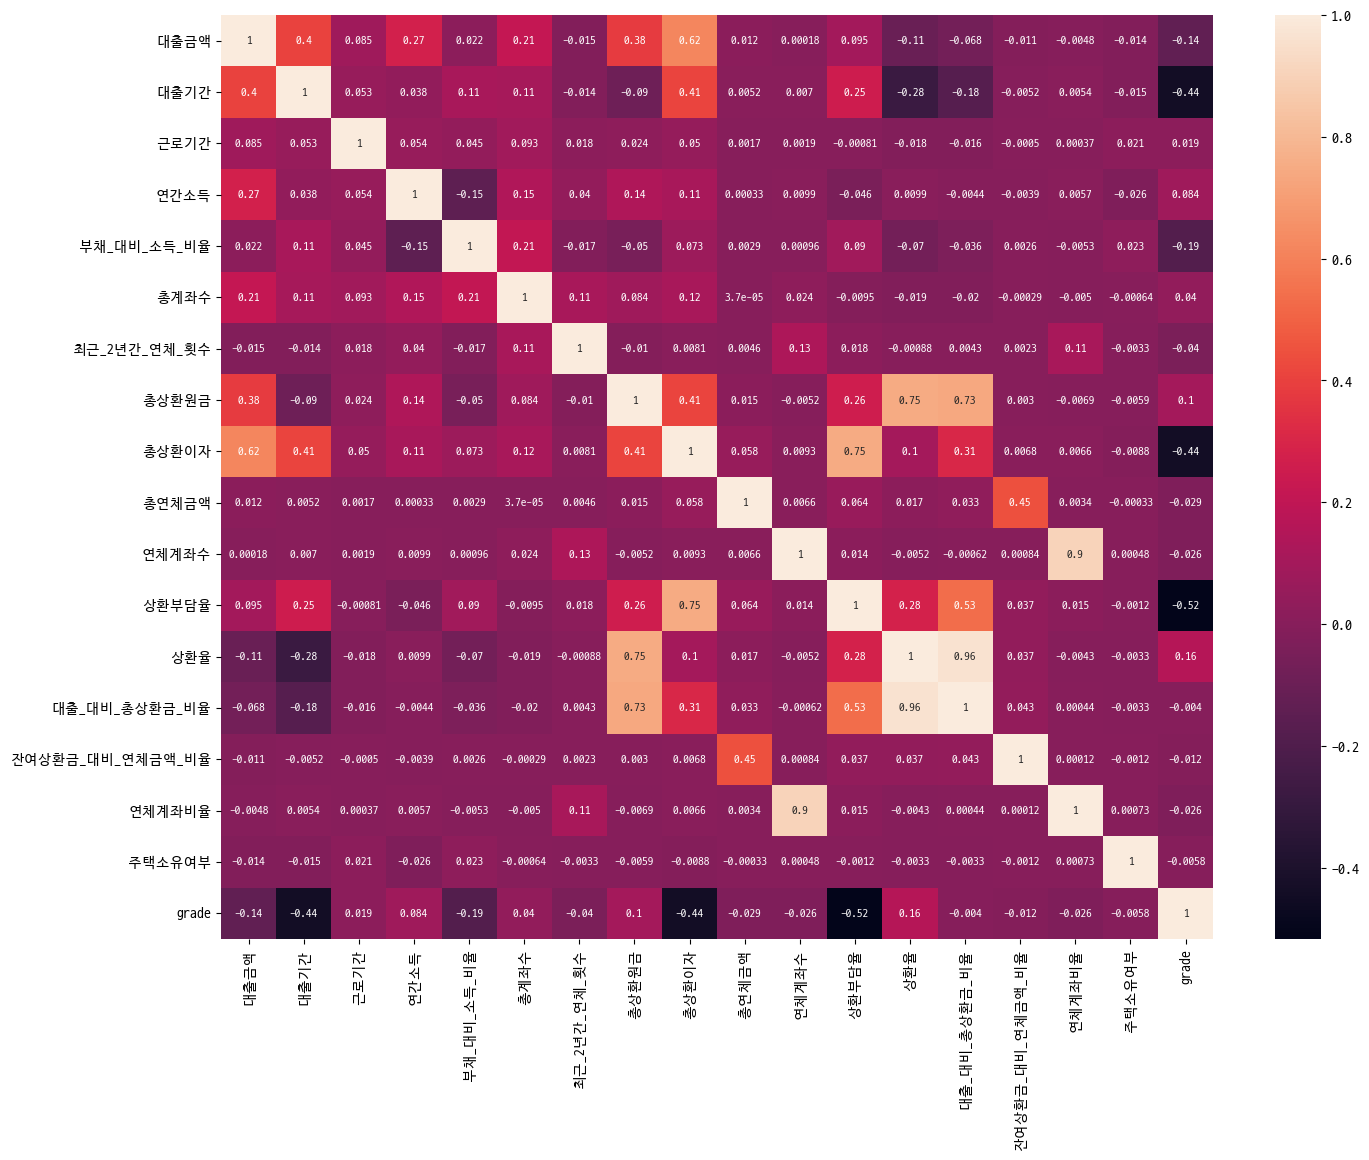

In [14]:
plt.rcParams["figure.figsize"] = (16,12)
sns.heatmap(train_df2.corr(), annot = True, annot_kws={"size": 8})
plt.show()

## 4. 모델

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### (1) RF

In [71]:
model_rf = RandomForestClassifier()

X_features = ['상환부담율', '상환율']

x = train_df2[X_features]
y = train_df2['grade']

model_rf.fit(x, y)
y_rf_pred = model_rf.predict(x)

def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted') #각 클래스에 대한 F1 스코어를 계산하고, 클래스별 샘플 수에 따라 가중 평균을 계산하여 전체 F1 스코어를 얻음
    print(model_name, ')', 'acc 스코어: ', acc, ',', 'f1 스코어: ', f1)

get_score('rf', y, y_rf_pred)

rf ) acc 스코어:  0.9609317395864705 , f1 스코어:  0.9615625099240729


In [17]:
model_rf2 = RandomForestClassifier()

X_features2 = ['상환부담율', '상환율', '대출_대비_총상환금_비율', '잔여상환금_대비_연체금액_비율', '연체계좌비율', '주택소유여부']

x2 = train_df2[X_features2]
y2 = train_df2['grade']

model_rf2.fit(x2, y2)
y_rf_pred2 = model_rf2.predict(x2)

get_score('rf2', y2, y_rf_pred2)

rf2 ) acc 스코어:  0.9584601165193731 , f1 스코어:  0.9590726227309109


In [28]:
model_rf3 = RandomForestClassifier()

X_features3 = ['상환부담율', '총상환이자', '상환율', '연간소득']

x3 = train_df2[X_features3]
y3 = train_df2['grade']

model_rf3.fit(x3, y3)
y_rf_pred3 = model_rf3.predict(x3)

get_score('rf3', y3, y_rf_pred3)

rf3 ) acc 스코어:  0.9687516226516985 , f1 스코어:  0.9688508447392195


In [36]:
model_rf4 = RandomForestClassifier()

X_features4 = ['상환부담율', '총상환이자', '상환율', '연간소득', '총계좌수']

x4 = train_df2[X_features4]
y4 = train_df2['grade']

model_rf4.fit(x4, y4)
y_rf_pred4 = model_rf4.predict(x4)

get_score('rf4', y4, y_rf_pred4)

rf4 ) acc 스코어:  0.9845887032286874 , f1 스코어:  0.9845893394601375


In [37]:
model_rf5 = RandomForestClassifier()

X_features5 = ['상환부담율', '총상환이자', '상환율', '연간소득', '대출금액']

x5 = train_df2[X_features5]
y5 = train_df2['grade']

model_rf5.fit(x5, y5)
y_rf_pred5 = model_rf5.predict(x5)

get_score('rf5', y5, y_rf_pred5)

rf5 ) acc 스코어:  0.9868110869949009 , f1 스코어:  0.9868140108522556


### (2) XGB, LGBM

In [19]:
model_xgb = XGBClassifier(random_state=42)
model_lgb = LGBMClassifier(random_state=42)

model_xgb.fit(x, y)
model_lgb.fit(x, y)

y_xgb_pred = model_xgb.predict(x)
y_lgb_pred = model_lgb.predict(x)

get_score('xgb', y, y_xgb_pred)
get_score('lgb', y, y_lgb_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 96293, number of used features: 3
[LightGBM] [Info] Start training from score -5.434896
[LightGBM] [Info] Start training from score -3.897517
[LightGBM] [Info] Start training from score -2.572151
[LightGBM] [Info] Start training from score -1.975580
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.206430
[LightGBM] [Info] Start training from score -1.747685
xgb ) acc 스코어:  0.9505467687163137 , f1 스코어:  0.9511487619349858
lgb ) acc 스코어:  0.9499548253767148 , f1 스코어:  0.9505448711189083


In [20]:
model_xgb2 = XGBClassifier(random_state=42)
model_lgb2 = LGBMClassifier(random_state=42)

model_xgb2.fit(x2, y2)
model_lgb2.fit(x2, y2)

y_xgb_pred2 = model_xgb2.predict(x2)
y_lgb_pred2 = model_lgb2.predict(x2)

get_score('xgb2', y2, y_xgb_pred2)
get_score('lgb2', y2, y_lgb_pred2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 96293, number of used features: 6
[LightGBM] [Info] Start training from score -5.434896
[LightGBM] [Info] Start training from score -3.897517
[LightGBM] [Info] Start training from score -2.572151
[LightGBM] [Info] Start training from score -1.975580
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.206430
[LightGBM] [Info] Start training from score -1.747685
xgb2 ) acc 스코어:  0.9482101502705285 , f1 스코어:  0.9487646912211969
lgb2 ) acc 스코어:  0.948573624250984 , f1 스코어:  0.9491357618767534


In [29]:
model_xgb3 = XGBClassifier(random_state=42)
model_lgb3 = LGBMClassifier(random_state=42)

model_xgb3.fit(x3, y3)
model_lgb3.fit(x3, y3)

y_xgb_pred3 = model_xgb3.predict(x3)
y_lgb_pred3 = model_lgb3.predict(x3)

get_score('xgb3', y3, y_xgb_pred3)
get_score('lgb3', y3, y_lgb_pred3)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 96293, number of used features: 4
[LightGBM] [Info] Start training from score -5.434896
[LightGBM] [Info] Start training from score -3.897517
[LightGBM] [Info] Start training from score -2.572151
[LightGBM] [Info] Start training from score -1.975580
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.206430
[LightGBM] [Info] Start training from score -1.747685
xgb3 ) acc 스코어:  0.9549707663070005 , f1 스코어:  0.9550791517547578
lgb3 ) acc 스코어:  0.9500898299980268 , f1 스코어:  0.9502132203831896


In [40]:
model_xgb4 = XGBClassifier(random_state=42)
model_lgb4 = LGBMClassifier(random_state=42)

model_xgb4.fit(x4, y4)
model_lgb4.fit(x4, y4)

y_xgb_pred4 = model_xgb4.predict(x4)
y_lgb_pred4 = model_lgb4.predict(x4)

get_score('xgb4', y4, y_xgb_pred4)
get_score('lgb4', y4, y_lgb_pred4)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 96293, number of used features: 5
[LightGBM] [Info] Start training from score -5.434896
[LightGBM] [Info] Start training from score -3.897517
[LightGBM] [Info] Start training from score -2.572151
[LightGBM] [Info] Start training from score -1.975580
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.206430
[LightGBM] [Info] Start training from score -1.747685
xgb4 ) acc 스코어:  0.9585431962863344 , f1 스코어:  0.9586384753603882
lgb4 ) acc 스코어:  0.9553965501126769 , f1 스코어:  0.9555355126746404


In [42]:
model_xgb5 = XGBClassifier(random_state=42)
model_lgb5 = LGBMClassifier(random_state=42)

model_xgb5.fit(x5, y5)
model_lgb5.fit(x5, y5)

y_xgb_pred5 = model_xgb5.predict(x5)
y_lgb_pred5 = model_lgb5.predict(x5)

get_score('xgb5', y5, y_xgb_pred5)
get_score('lgb5', y5, y_lgb_pred5)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 96293, number of used features: 5
[LightGBM] [Info] Start training from score -5.434896
[LightGBM] [Info] Start training from score -3.897517
[LightGBM] [Info] Start training from score -2.572151
[LightGBM] [Info] Start training from score -1.975580
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.206430
[LightGBM] [Info] Start training from score -1.747685
xgb5 ) acc 스코어:  0.9596543881694412 , f1 스코어:  0.9596860252127539
lgb5 ) acc 스코어:  0.9574631593158381 , f1 스코어:  0.9575147292597844


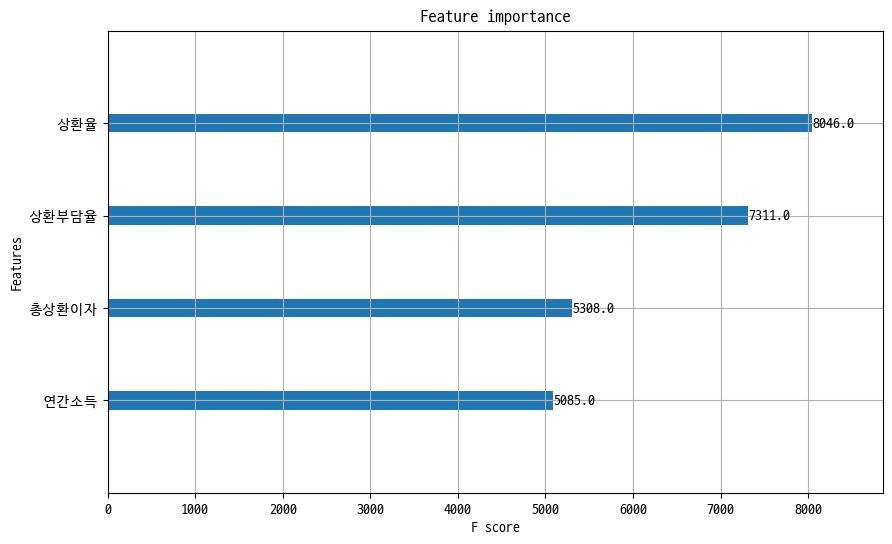

In [32]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,6)
plot_importance(model_xgb3)
plt.show()

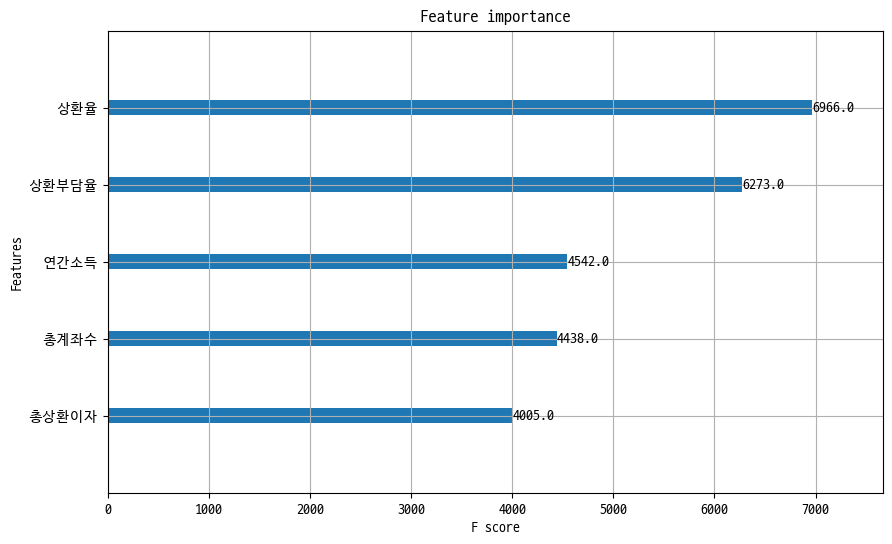

In [41]:
plt.rcParams["figure.figsize"] = (10,6)
plot_importance(model_xgb4)
plt.show()

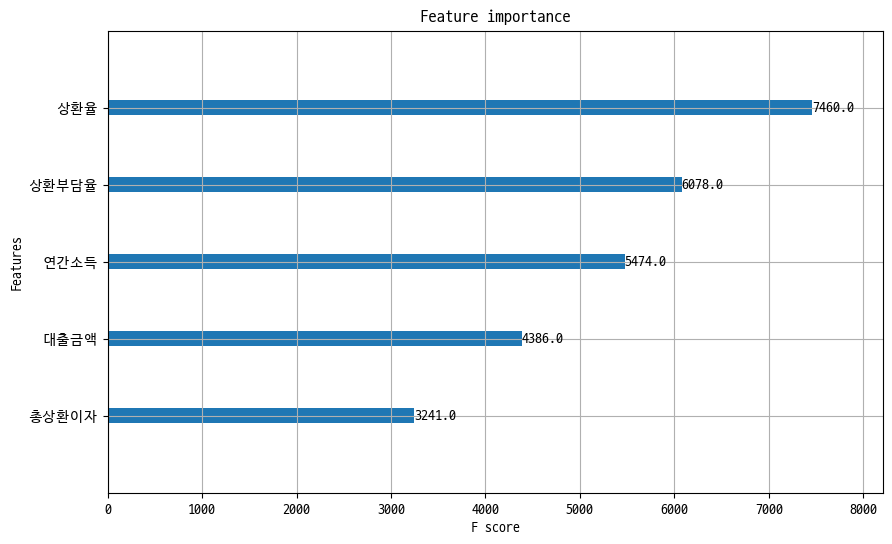

In [44]:
plt.rcParams["figure.figsize"] = (10,6)
plot_importance(model_xgb5)
plt.show()

## 4. 모델 (재)

### (1) train/test 데이터 분리

In [62]:
# X0 = train_df2[X_features3]
# y0 = train_df2['grade']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size = 0.25, stratify = y0, random_state = 42)

### (2) 스코어 비교

- X_features = ['총상환이자', '상환부담율', '상환율']
    - (rf) acc 0.9437, f1 0.9443
    - (xgb) acc 0.9391, f1 0.9395
    - (lgbm) acc 0.9391, f1 0.9395

- X_features3 = ['총상환이자', '상환부담율', '상환율', '연간소득']
    - (rf) acc 0.9460, f1 0.9461
    - (xgb) acc 0.9386, f1 0.9386
    - (lgbm) acc 0.9386, f1 0.9386

In [63]:
# model_rf0 = RandomForestClassifier()
# model_xgb0 = XGBClassifier(random_state=42)
# model_lgb0 = LGBMClassifier(random_state = 42)

# model_rf0.fit(X_train, y_train)
# model_xgb0.fit(X_train, y_train)
# model_lgb0.fit(X_train, y_train)

# y_pred_rf0 = model_rf0.predict(X_test)
# y_pred_xgb0 = model_xgb0.predict(X_test)
# y_pred_lgb0 = model_lgb0.predict(X_test)

# get_score('model_rf0', y_test, y_pred_rf0)
# get_score('model_xgb0', y_test, y_pred_xgb0)
# get_score('model_lgb0', y_test, y_pred_xgb0)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 72219, number of used features: 4
[LightGBM] [Info] Start training from score -5.434886
[LightGBM] [Info] Start training from score -3.897166
[LightGBM] [Info] Start training from score -2.572232
[LightGBM] [Info] Start training from score -1.975619
[LightGBM] [Info] Start training from score -1.248797
[LightGBM] [Info] Start training from score -1.206408
[LightGBM] [Info] Start training from score -1.747674
model_rf0 ) acc 스코어:  0.9476198388302733 , f1 스코어:  0.9476834592848535
model_xgb0 ) acc 스코어:  0.9386059649414306 , f1 스코어:  0.9386000554308193
model_lgb0 ) acc 스코어:  0.9386059649414306 , f1 스코어:  0.9386000554308193


In [ ]:
# model_rf = RandomForestClassifier()

# X_features = ['총상환이자', '상환부담율', '상환율']

# x = train_df2[X_features]
# y = train_df2['grade']

# model_rf.fit(x, y)
# y_rf_pred = model_rf.predict(x)

# def get_score(model_name, y_true, y_pred):
#     acc = accuracy_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred, average='weighted') #각 클래스에 대한 F1 스코어를 계산하고, 클래스별 샘플 수에 따라 가중 평균을 계산하여 전체 F1 스코어를 얻음
#     print(model_name, ')', 'acc 스코어: ', acc, ',', 'f1 스코어: ', f1)

# get_score('rf', y, y_rf_pred)

### (3) GridSearchCV

In [64]:
# # X_features3 = ['총상환이자', '상환부담율', '상환율', '연간소득']

# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# model_rf_fin = RandomForestClassifier()

# # 탐색할 하이퍼파라미터 그리드
# param_grid = {
#     'n_estimators': [2, 3, 4],
#     'max_depth': [5, 7],
#     'min_samples_split': [2, 5, 10]
# }

# # Grid Search 및 Cross Validation 수행
# grid_search = GridSearchCV(estimator=model_rf_fin, param_grid=param_grid, cv=5, scoring='f1_weighted')
# grid_search.fit(X_test, y_test)

# # 최적의 하이퍼파라미터 출력
# print("BestParameters:", grid_search.best_params_)

# # 최적의 모델을 사용하여 예측 및 성능 평가
# best_model = grid_search.best_estimator_
# y_pred_fin = best_model.predict(X_test)
# f1_fin = f1_score(y_test, y_pred_fin, average='weighted')
# print("F1 Score: ", f1_fin)

BestParameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 3}
F1 Score:  0.8540265068783418


## 5. EDA 

- X_features = ['상환부담율', '상환율']
- X_features3 = ['상환부담율', '총상환이자', '상환율', '연간소득']

### (1) 컬럼 정리

In [161]:
train_df2.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부,grade
0,12480000,36,6.0,72000000,18.90,15,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,4
1,14400000,60,10.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0,0.016254,0.025943,0.042197,0.0,0.0,0,5
2,12000000,36,5.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0,0.012662,0.077387,0.090049,0.0,0.0,0,6
3,14400000,36,8.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0,0.010632,0.022627,0.033259,0.0,0.0,0,4
4,18000000,60,NaN,71736000,25.39,19,0,228540,148956.0,0.0,0.0,0.008275,0.012697,0.020972,0.0,0.0,0,5


In [164]:
train_df3 = train_df2[['상환부담율', '상환율', 'grade']]
train_df3

,상환부담율,상환율,grade
0,0.000000,0.000000,4
1,0.016254,0.025943,5
2,0.012662,0.077387,6
3,0.010632,0.022627,4
4,0.008275,0.012697,5
...,...,...,...
96289,0.034178,0.067679,4
96290,0.029690,0.020268,2
96291,0.016753,0.103412,6
96292,0.052441,0.088357,3


<Axes: xlabel='grade', ylabel='상환부담율'>

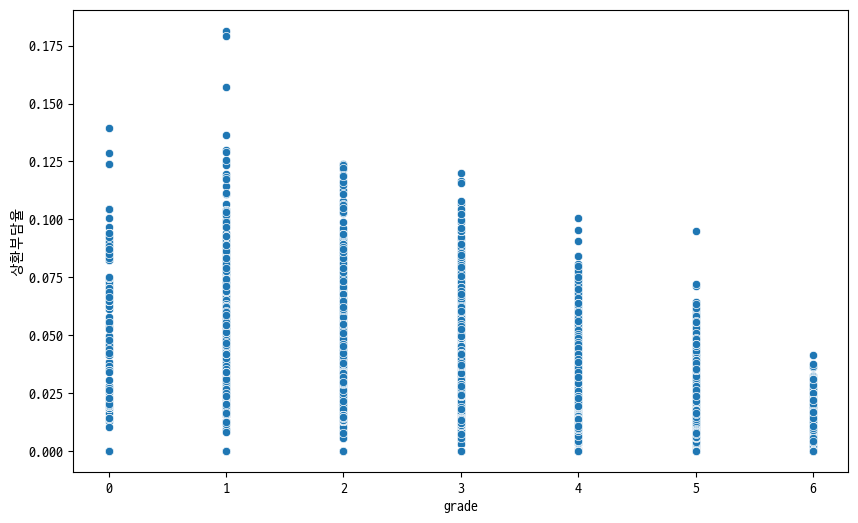

In [165]:
sns.scatterplot(train_df3, y = '상환부담율', x = 'grade')

<Axes: xlabel='상환부담율', ylabel='Count'>

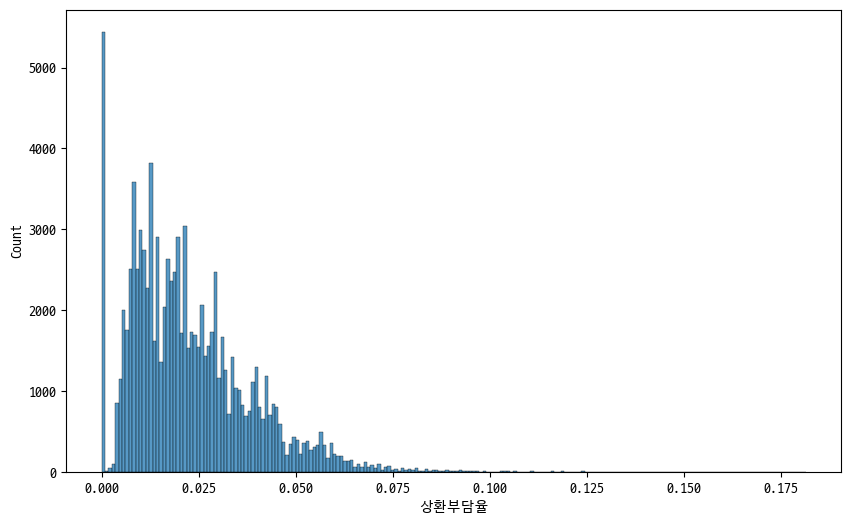

In [178]:
sns.histplot(train_df3, x = '상환부담율')

<Axes: xlabel='grade', ylabel='상환부담율'>

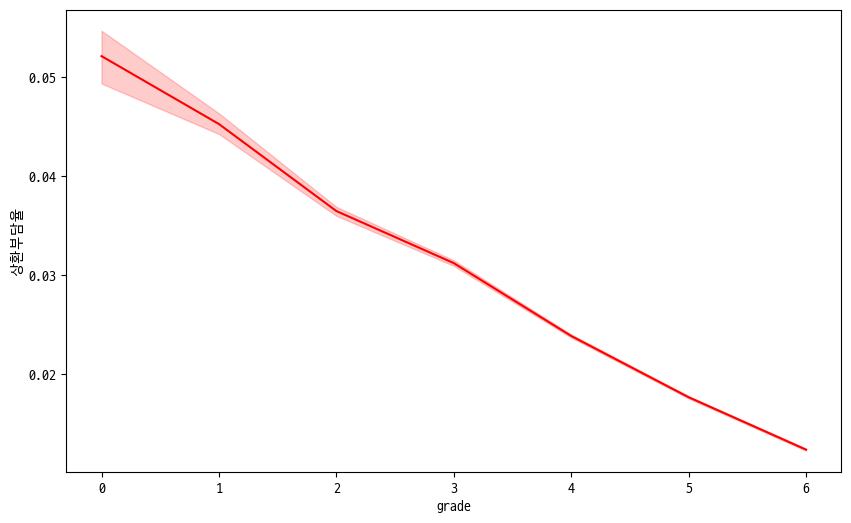

In [179]:
sns.lineplot(data=train_df3, x='grade', y='상환부담율', color='red')

<Axes: xlabel='grade', ylabel='상환율'>

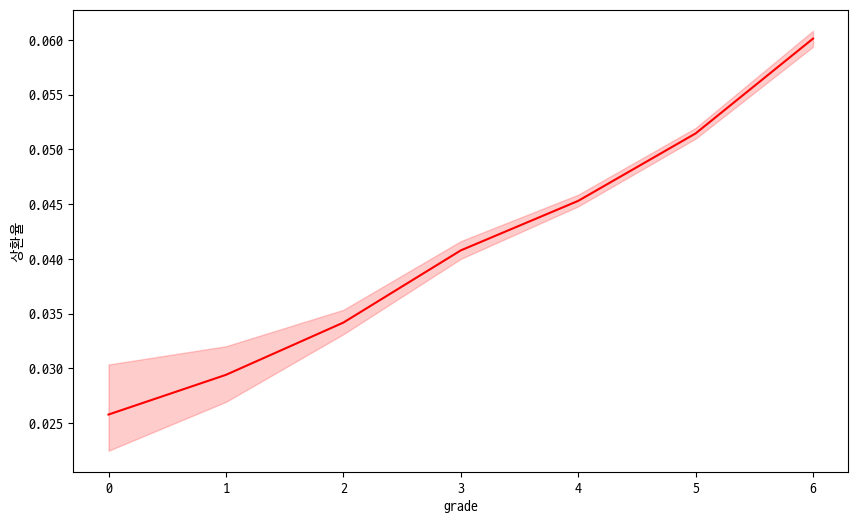

In [149]:
sns.lineplot(data = train_df2, x = 'grade', y = '상환율', color = 'red')

## 6. 가중치 (선형회귀)

- X_features = ['상환부담율', '상환율']
- X_features3 = ['상환부담율', '총상환이자', '상환율', '연간소득']

In [134]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X = train_df2[X_features]
y = train_df2['grade']

lr_model = LinearRegression()
# lor_model = LogisticRegression()

lr_model.fit(X, y)
# lor_model.fit(X, y)

# 학습된 모델의 계수 확인
lr_coef = lr_model.coef_
lr_intercept = lr_model.intercept_
# lor_coef = lor_model.coef_[0]
# lor_intercept = lor_model.intercept_

# 변수 지정
w1 = lr_coef[0].round(2)
w2 = lr_coef[1].round(2)
bias = lr_intercept.round(2)

print(w1, w2, bias)
print("lr 최종 신용 점수 =", "상환부담율 *", w1, "+", "상환율 *", w2, "+", bias)

-49.92 8.89 4.98
lr 최종 신용 점수 = 상환부담율 * -49.92 + 상환율 * 8.89 + 4.98


## 6. 신용점수 구하기

In [159]:
train_df4 = train_df2.copy()
train_df4

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율,주택소유여부,grade
0,12480000,36,6.0,72000000,18.90,15,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0,4
1,14400000,60,10.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0,0.016254,0.025943,0.042197,0.0,0.0,0,5
2,12000000,36,5.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0,0.012662,0.077387,0.090049,0.0,0.0,0,6
3,14400000,36,8.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0,0.010632,0.022627,0.033259,0.0,0.0,0,4
4,18000000,60,NaN,71736000,25.39,19,0,228540,148956.0,0.0,0.0,0.008275,0.012697,0.020972,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36,10.0,210000000,9.33,33,0,974580,492168.0,0.0,0.0,0.034178,0.067679,0.101858,0.0,0.0,0,4
96290,28800000,60,10.0,132000000,5.16,25,0,583728,855084.0,0.0,0.0,0.029690,0.020268,0.049959,0.0,0.0,0,2
96291,14400000,36,1.0,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,0.016753,0.103412,0.120164,0.0,0.0,0,6
96292,15600000,36,5.0,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,0.052441,0.088357,0.140798,0.0,0.0,0,3


### (1) 컬럼 정리

In [ ]:
train_df3 = train_df3.drop(['대출_대비_총상환금_비율'], axis = 1)
train_df3 = train_df3.drop(['잔여상환금_대비_연체금액_비율'], axis = 1)
train_df3 = train_df3.drop(['연체계좌비율'], axis = 1)
train_df3 = train_df3.drop(['주택소유여부'], axis = 1)
train_df3

lr 최종 신용 점수 = 상환부담율 * -49.92 + 상환율 * 8.89 + 4.98

In [181]:
train_df3['신용점수'] = (train_df3['상환부담율'] * 100 * (-49.92)) + (train_df3['상환율'] * 8.89 * 100) + 4.98
train_df3

C:\Users\LOVE\AppData\Local\Temp\ipykernel_16712\287424697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df3['신용점수'] = (train_df3['상환부담율'] * 100 * (-49.92)) + (train_df3['상환율'] * 8.89 * 100) + 4.98


,상환부담율,상환율,grade,신용점수
0,0.000000,0.000000,4,4.980000
1,0.016254,0.025943,5,-53.097918
2,0.012662,0.077387,6,10.568339
3,0.010632,0.022627,4,-27.982333
4,0.008275,0.012697,5,-25.043127
...,...,...,...,...
96289,0.034178,0.067679,4,-105.471461
96290,0.029690,0.020268,2,-125.216012
96291,0.016753,0.103412,6,13.284492
96292,0.052441,0.088357,3,-178.255015


In [182]:
train_df3[['신용점수']].describe()

,신용점수
count,96293.000000
mean,-65.139277
std,77.339765
min,-827.852433
25%,-100.537202
50%,-47.644919
75%,-16.071545
max,873.369562


### (2) 스케일링 (0~1000)

- MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler

# 범위(0~1000) 설정
mnmx_scaler = MinMaxScaler(feature_range=(0, 1000))  

train_df3['최종신용점수(mnmx)'] = mnmx_scaler.fit_transform(train_df3[['신용점수']])
train_df3[['최종신용점수(mnmx)']].describe()

C:\Users\LOVE\AppData\Local\Temp\ipykernel_16712\4053185983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df3['최종신용점수(mnmx)'] = mnmx_scaler.fit_transform(train_df3[['신용점수']])


,최종신용점수(mnmx)
count,96293.000000
mean,448.332527
std,45.461301
min,0.000000
25%,427.525175
50%,458.615934
75%,477.175166
max,1000.000000


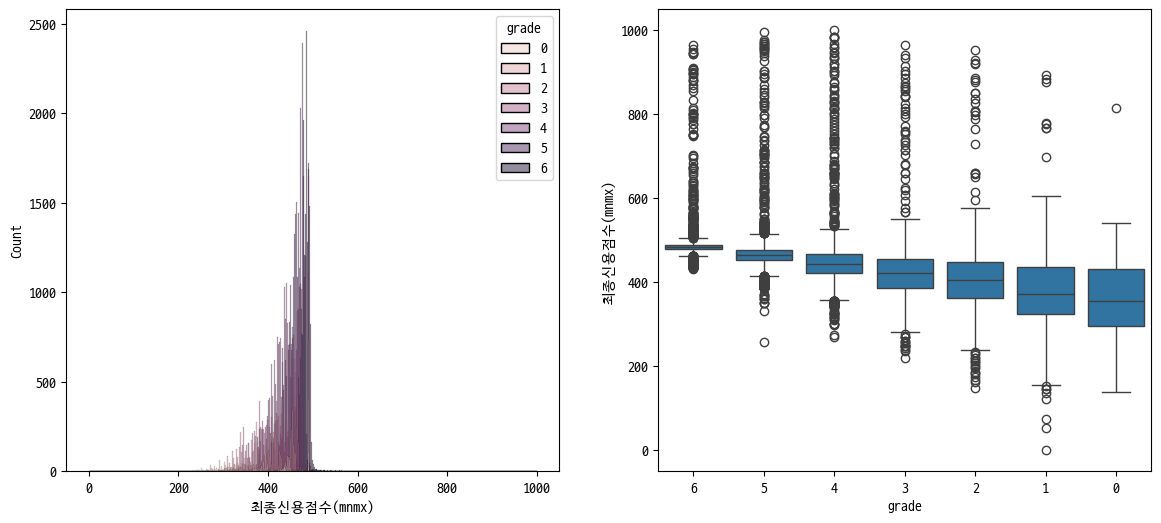

In [184]:
hue_order = [6, 5, 4, 3, 2, 1, 0]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
sns.histplot(data=train_df3, x='최종신용점수(mnmx)', hue='grade', ax=ax[0])
sns.boxplot(data=train_df3, y='최종신용점수(mnmx)', x='grade', order=hue_order, ax=ax[1])
plt.show()

- RobustScaler

In [157]:
from sklearn.preprocessing import RobustScaler

rbst_scaler = RobustScaler()
score_data = train_df3[['신용점수']]

score_data_scaled = rbst_scaler.fit_transform(score_data)

# 스케일링된 데이터의 최솟값과 최댓값 확인
min_scaled_value = score_data_scaled.min()
max_scaled_value = score_data_scaled.max()

# 스케일링된 값의 범위를 0에서 1000으로 조정
final_score = ((score_data_scaled - min_scaled_value) / (max_scaled_value - min_scaled_value)) * 1000

train_df3['최종신용점수(rbst)'] = final_score
train_df3[['최종신용점수(rbst)']].describe()